In [1]:
pip install timm

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pydicom

Note: you may need to restart the kernel to use updated packages.


In [16]:
import os
import shutil

import cv2
import torch
import urllib.request

import matplotlib.pyplot as plt

In [17]:
import os.path

In [27]:
%matplotlib inline

import numpy as np
from numpy import asarray
from IPython import display

from cv2 import (VideoCapture, namedWindow, imshow, waitKey, destroyWindow, imwrite)

In [19]:
import pydicom as dicom
from PIL import Image
import time

In [7]:
os.chdir("/Users/alifakhry/Downloads/LungCT_Diagnosis/Midas_Algo/New_Images")

In [8]:
os.getcwd()

'/Users/alifakhry/Downloads/LungCT_Diagnosis/Midas_Algo/New_Images'

In [11]:
'''
The data is stored in "New_Images"
This is from Cancer Imaging directory.
Executing this would cause the data from 

Seperate into folders based on the data directory.
'''

def check_directory(directory):
    check_fold = os.path.isdir(directory)
    if not check_fold:
        os.makedirs(directory)

def join_data():

    path = ""

    for dirpath, dirnames, filenames in os.walk("."):
        for filename in [f for f in filenames if f.endswith(".dcm")]:
            try:
                path = dirpath[-5:]
                check_directory("/Users/alifakhry/Downloads/LungCT_Diagnosis/Midas_Algo/New_Images_Sorted/" + str(path))
                shutil.copy(os.path.join(dirpath, filename), "/Users/alifakhry/Downloads/LungCT_Diagnosis/Midas_Algo/New_Images_Sorted/" + str(path) + "/" + str(filename))
            except:
                continue
                
join_bool = input("Y/N (Join)?")
if (join_bool == "Y"):
    join_data()

Y/N (Join)?N


In [14]:
'''
Take the data from New_Images_Sorted. Convert them to png files. 
Make them more "HD." Move to New_Images_Scanned.
'''

def scan_files():

    for dirpath, dirnames, filenames in os.walk("."):
        for filename in [f for f in filenames if f.endswith(".dcm")]:
            try:
                path = dirpath[-5:]
                check_directory("/Users/alifakhry/Downloads/LungCT_Diagnosis/Midas_Algo/New_Images_Scanned/" + str(path))
                ds = dicom.dcmread(os.path.join(dirpath, filename))
                img = ds.pixel_array
                kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
                img = cv2.filter2D(img, -1, kernel)
                plt.imsave("/Users/alifakhry/Downloads/LungCT_Diagnosis/Midas_Algo/New_Images_Scanned/" + str(path) + "/" + str(filename) + ".png", img)
            except:
                continue
                
join_bool = input("Y/N (Join)?")
if (join_bool == "Y"):
    scan_files()

Y/N (Join)?N


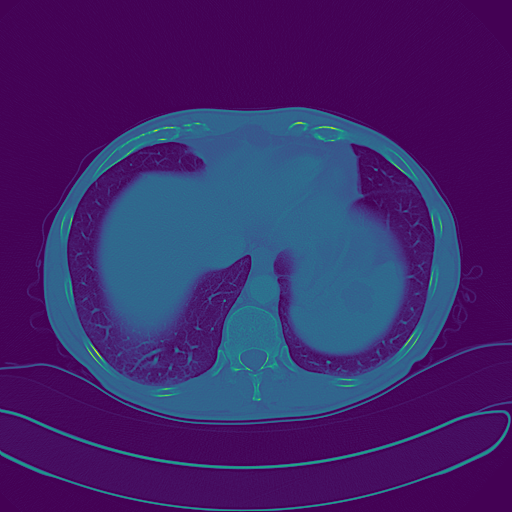

In [55]:
img = Image.open('/Users/alifakhry/Downloads/LungCT_Diagnosis/Midas_Algo/New_Images_Scanned/R_214/1-47.dcm.png')
img

In [ ]:
def take_pic():
    curr_cam = VideoCapture(0)

    time.sleep(5)

    image = curr_cam.read()[1]

    curr_cam.release()

    imwrite(/Users/alifakhry/Downloads/LungCT_Diagnosis/Midas_Algo/Test_Image.png", image)
    
    img = Image.open('/Users/alifakhry/Downloads/LungCT_Diagnosis/Midas_Algo/New_Images_Scanned/R_214/1-47.dcm.png')



In [42]:
img = cv2.imread('Scanned_Images/Test_Image_4.png')
# kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
# img = cv2.filter2D(img, -1, kernel)
# img = cv2.detailEnhance(img, sigma_s=10, sigma_r=0.15)
# plt.imsave("Image_Update.png", img)
# plt.imshow(img)

In [43]:
filename = "Scanned_Images/Test_Image_4.png"

model_type = "DPT_Large"  

midas = torch.hub.load("intel-isl/MiDaS", model_type)

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
midas.to(device)

midas.eval()

midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")

transform = midas_transforms.dpt_transform

img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

input_batch = transform(img).to(device)

with torch.no_grad():
    prediction = midas(input_batch)
    
    prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=img.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()
    
output = prediction.cpu().numpy()



Using cache found in /Users/alifakhry/.cache/torch/hub/intel-isl_MiDaS_master
Using cache found in /Users/alifakhry/.cache/torch/hub/intel-isl_MiDaS_master


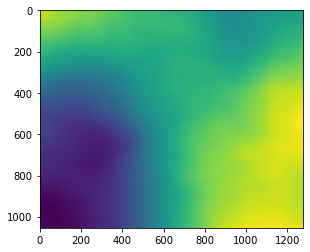

In [44]:
im_prod = plt.imshow(output)

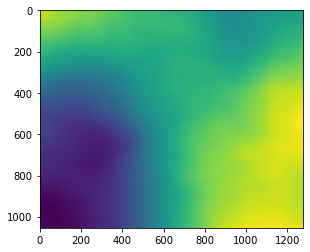

In [45]:
plt.imshow(output)
plt.imsave("Prod.png", output)

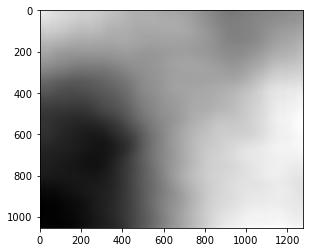

In [46]:
plt.imshow(output, cmap='gray')

In [ ]:
plt.imsave("Prod_Gray.png", output, cmap='gray')

In [ ]:
import numpy as np

img = cv2.imread('Prod_Gray.png', 0)

In [ ]:
img_reverted= cv2.bitwise_not(img)

In [ ]:
new_img = img_reverted / 255.0 

In [ ]:
half_way = len(new_img[0])//2

print(new_img[0][half_way])
print(new_img[0][0])
print(new_img[0][len(new_img[0])-1])